Polynomial regression - model selection - choosing the order

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

In [3]:
N = 20 # number training points
true_pars = np.array([3,-1,2])
x = np.random.rand(N,1)
x.sort()
noise_ss = 0.05

In [4]:
X = np.hstack((np.ones_like(x),x,x**2))
y = np.dot(X,true_pars)
y += np.random.randn(N)*np.sqrt(noise_ss)

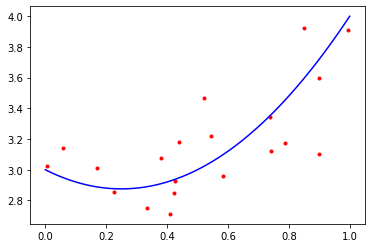

In [5]:
# Plot the data
plt.plot(x,y,'r.')
# Plot the true function
plotx = np.linspace(0,1,100)[:,None]
plt.plot(plotx,true_pars[0]+true_pars[1]*plotx+true_pars[2]*plotx**2,'b')
plt.savefig('true.png')

In [6]:
# create a validation set
Nval = 100
valx = np.random.rand(Nval,1)
valx.sort()
valX = np.hstack((np.ones_like(valx),valx,valx**2))
valy = np.dot(valX,true_pars)
valy += np.random.randn(Nval)*np.sqrt(noise_ss)


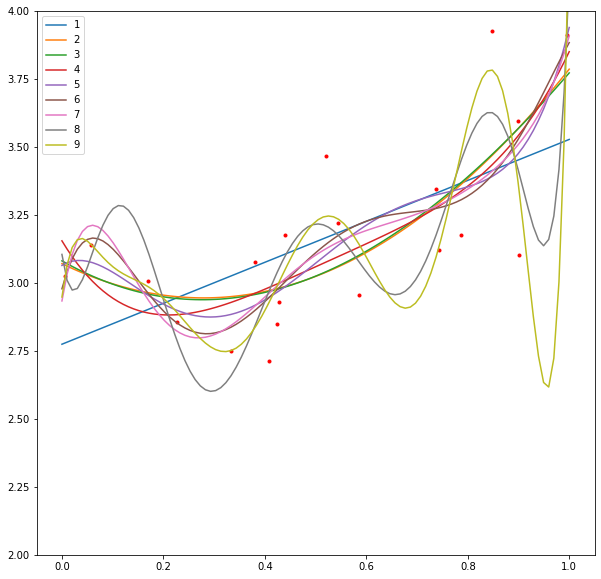

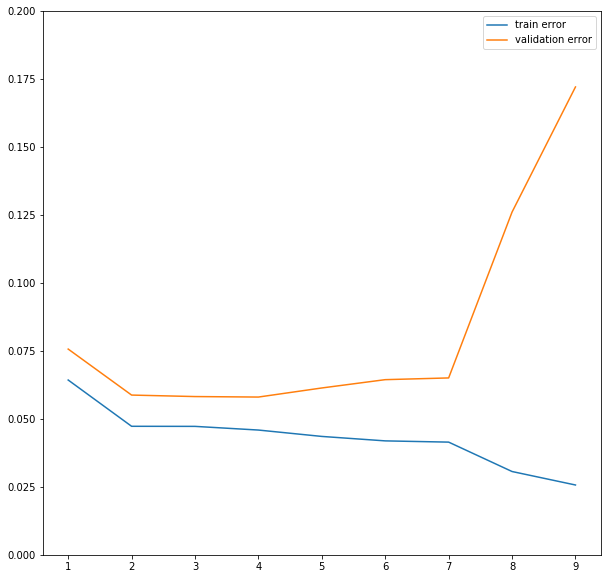

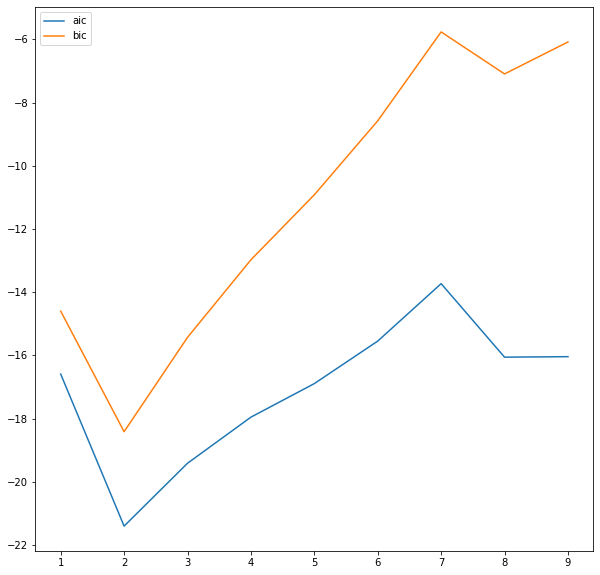

In [11]:
# loop over orders
plt.figure(figsize=(10,10))
plt.plot(x,y,'r.')
X = np.ones_like(x)
valX = np.ones_like(valx)
plotX = np.ones_like(plotx)
train_err = []
val_err = []
aic = []
bic = []
for k in range(1,10):
    X = np.hstack((X,x**k))
    valX = np.hstack((valX,valx**k))
    plotX = np.hstack((plotX,plotx**k))
    # find w, linear reg
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    plt.plot(plotx,np.dot(plotX,w),label=k)
    
    train_pred = np.dot(X,w)
    train_err.append(((train_pred - y)**2).mean())
    
    val_pred = np.dot(valX,w)
    val_err.append(((val_pred - valy)**2).mean())
    
    # compute log likelihood (using true noise_ss)
    const = -np.log(2*np.pi*noise_ss)
    like = (const-(0.5*(1.0/noise_ss)*(train_pred-y)**2)).sum()
    # compute aic
    n_pars = k+1
    aic.append(2*n_pars - 2*like)
    
    bic.append(np.log(N)*n_pars - 2*like)
    
    
plt.ylim([2,4])
plt.legend()
plt.savefig('polyfuns.png')

plt.figure(figsize=(10,10))
plt.plot(range(1,10),train_err,label='train error')
plt.plot(range(1,10),val_err,label='validation error')
plt.ylim([0,0.2])
plt.legend()
plt.savefig('trainval.png')

plt.figure(figsize=(10,10))
plt.plot(range(1,10),aic,label = 'aic')
plt.plot(range(1,10),bic,label = 'bic')
plt.legend()
